# Analysis of Crime Reports in Portland, OR, 2004-2014

Describe data, why is 2010 missing, why my appoach.

**Only use up to 2014 to avoid data type change, no data for 2010.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The data is structured separately by year, however it will be easier to manipulate if it's in a single dataframe. Let's import all the data and combine it in a useful format.

In [2]:
df2004 = pd.read_csv('crime_incident_data2004.csv')
df2005 = pd.read_csv('crime_incident_data2005.csv')
df2006 = pd.read_csv('crime_incident_data2006.csv')
df2007 = pd.read_csv('crime_incident_data2007.csv')
df2008 = pd.read_csv('crime_incident_data2008.csv')
df2009 = pd.read_csv('crime_incident_data2009.csv')
df2011 = pd.read_csv('crime_incident_data2011.csv')
df2012 = pd.read_csv('crime_incident_data2012.csv')
df2013 = pd.read_csv('crime_incident_data2013.csv')
df2014 = pd.read_csv('crime_incident_data2014.csv')

Addind a 'Year' column so we don't lose that information when we merge the dataframes.

In [3]:
df2004['Year'] = 2004
df2005['Year'] = 2005
df2006['Year'] = 2006
df2007['Year'] = 2007
df2008['Year'] = 2008
df2009['Year'] = 2009
df2011['Year'] = 2011
df2012['Year'] = 2012
df2013['Year'] = 2013
df2014['Year'] = 2014

In [4]:
df = pd.concat([df2004, df2005, df2006, df2007, df2008, df2009, df2011, df2012, df2013, df2014])
all_years = [2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014]

In [7]:
df

,Record ID,Report Date,Report Time,Major Offense Type,Address,Neighborhood,Police Precinct,Police District,X Coordinate,Y Coordinate,Year
0,10711678,03/02/2004,11:09:00,Larceny,"NE HOLLADAY ST and NE 1ST AVE, PORTLAND, OR 97232",LLOYD,PORTLAND PREC NO,690,7.647409e+06,686790.02595,2004
1,10704487,02/11/2004,09:18:00,Motor Vehicle Theft,"NE WEIDLER ST and NE 1ST AVE, PORTLAND, OR 97232",LLOYD,PORTLAND PREC NO,690,7.647471e+06,688344.45000,2004
2,10796264,10/27/2004,22:19:00,Larceny,"NE SCHUYLER ST and NE 1ST AVE, PORTLAND, OR 97212",ELIOT,PORTLAND PREC NO,590,7.647488e+06,688869.34833,2004
3,10744595,06/08/2004,12:06:00,"Assault, Simple","101-199 block of NW 1ST AVE, PORTLAND, OR 97209",CHINA/OLD TOWN,PORTLAND PREC CE,822,7.645656e+06,684567.37810,2004
4,10803413,11/16/2004,17:00:00,Disorderly Conduct,"101-199 block of NW 1ST AVE, PORTLAND, OR 97209",CHINA/OLD TOWN,PORTLAND PREC CE,822,7.645656e+06,684567.37810,2004
5,10804932,11/20/2004,01:45:00,"Assault, Simple","NW COUCH ST and NW 1ST AVE, PORTLAND, OR 97209",CHINA/OLD TOWN,PORTLAND PREC CE,822,7.645656e+06,684567.37810,2004
6,10781121,09/18/2004,19:27:00,Motor Vehicle Theft,"NW DAVIS ST and NW 1ST AVE, PORTLAND, OR 97209",CHINA/OLD TOWN,PORTLAND PREC CE,822,7.645653e+06,684826.79571,2004
7,10803412,11/16/2004,15:35:00,Trespass,"NW DAVIS ST and NW 1ST AVE, PORTLAND, OR 97209",CHINA/OLD TOWN,PORTLAND PREC CE,822,7.645653e+06,684826.79571,2004
8,10703076,02/05/2004,23:40:00,Disorderly Conduct,"NW COUCH ST and NW 1ST AVE, PORTLAND, OR 97209",CHINA/OLD TOWN,PORTLAND PREC CE,822,7.645656e+06,684567.37810,2004
9,10716464,03/16/2004,15:40:00,Liquor Laws,"NW COUCH ST and NW 1ST AVE, PORTLAND, OR 97209",CHINA/OLD TOWN,PORTLAND PREC CE,822,7.645656e+06,684567.37810,2004


Here's how our data looks. Luckily it is already quite clean -- each row is an individual crime report, and includes the date, the time, the type of offense, street address, neighborhood, X and Y coordinates, and year (which we added). There is plenty to do here. The bar plot below shows the total number of crime reports per year for all of Portland.

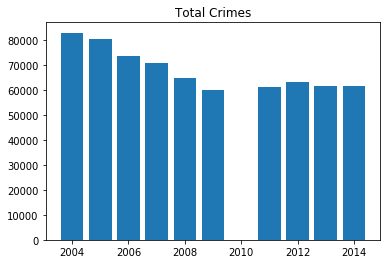

In [5]:
plt.bar(all_years, [len(df[df['Year']==x]) for x in all_years])

plt.title('Total Crimes')
plt.show()

## Location of Crimes

Where did these crimes take place? Because the data provided X and Y coordinates, we have an easy way of visualizing the data without having to worry about geolocating street addresses. Because of the density of crime reports, we'll actually be able to get a pretty good map of the city just by plotting each report in X-Y space.

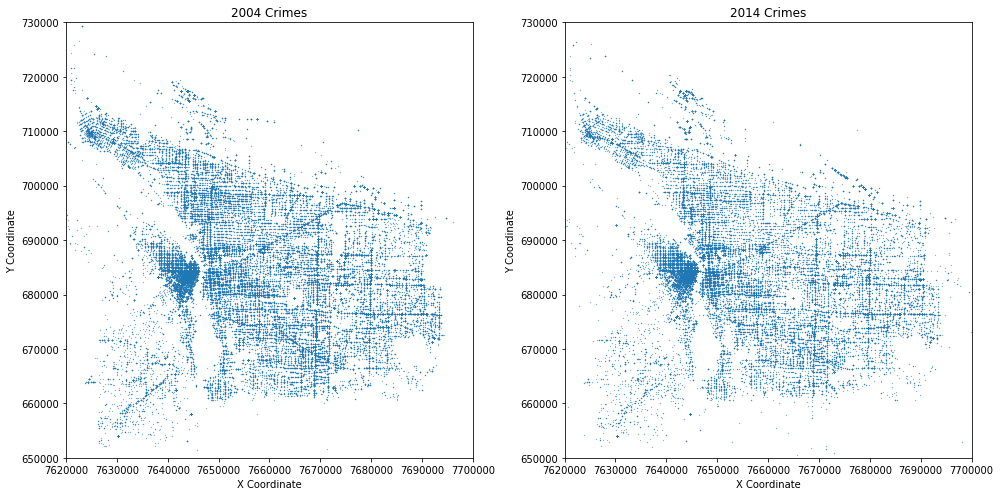

In [9]:
plt.figure(figsize=(14,7))
years = [2004, 2014]

for i in range(len(years)):

    plt.subplot(1,2,i+1)
    plt.scatter(
        df[df['Year']==years[i]]['X Coordinate'], 
        df[df['Year']==years[i]]['Y Coordinate'], 
        s = .05
        )
    plt.xlim(7620000, 7700000)
    plt.ylim(650000, 730000)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('{} Crimes'.format(years[i]))

plt.tight_layout()
plt.show()

We can see how the density of crime changes throughout the city -- the dense cluster of points around (7640000, 680000) is Downtown Portland. The strong diagonal line running northeast from the city center is Sandy Blvd, which is a main thoroughfare. Those familiar with the city will recognize other busy streets, as well as neighborhood centers.

## Type of Crime

Let's see the types of crimes reported in Portland.

In [ ]:
df['Major Offense Type'].value_counts().plot(kind='bar')

plt.show()

Larceny (theft) dominates the dataset. Let's see how things look without it.

In [ ]:
df['Major Offense Type'].value_counts()[1:].plot(kind='bar')

plt.show()

There are several types of crime which are quite common, and a tail of rare crimes (everything starting with Sex Offenses). It's still hard to see how many of those crime have actually occured, so let's look at those specifically.

In [ ]:
df['Major Offense Type'].value_counts()[-12:].plot(kind='bar')

plt.show()

Let's just look at homicides in the city.

In [ ]:
df[df['Major Offense Type']=='Homicide']['Year'].value_counts().sort_index().plot(kind='bar')
plt.show()

## Where Did These Homocides Occur?

In [ ]:
plt.figure(figsize=(10,10))
year = 2014 # Enter desired year
crime_type = 'Homicide' # Enter crime type

plt.scatter(
    df[df['Year']==year]['X Coordinate'], 
    df[df['Year']==year]['Y Coordinate'], 
    s=.05, 
    c='b')
plt.scatter(
    df[(df['Year']==year) & (df['Major Offense Type']==crime_type)]['X Coordinate'], 
    df[(df['Year']==year) & (df['Major Offense Type']==crime_type)]['Y Coordinate'], 
    s=60, 
    c='r',
    marker='x'
    )
plt.xlim(7620000, 7700000)
plt.ylim(650000, 730000)
plt.title('{} Crime, with {}s in Red'.format(year, crime_type))

plt.tight_layout()
plt.show()

We get the general sense from the data that crime has decreased from 2004 to 2014, but let's look at this a bit more concretely. Specifically, let's compare the first three years of data (2004-2006) with the last three (2012-2014). By spanning a few years we may smooth out anomolous years.

In [ ]:
all_crimes = sorted(list(df['Major Offense Type'].unique()))

crime_counts = pd.DataFrame()

for year in all_years:
    for crime in all_crimes:
        crime_counts.loc[crime, year] = len(df[(df['Year']==year) & (df['Major Offense Type']==crime)])
        
crime_sorted = crime_counts.sort_values(2005, ascending=False) # Sorting by the frequency of crimes in 2005

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
width = .3

(crime_sorted[2004]+crime_sorted[2005]+crime_sorted[2006]).plot(
    kind='bar',
    position=1,
    color='red',
    width=width
    )

(crime_sorted[2012]+crime_sorted[2013]+crime_sorted[2014]).plot(
    kind='bar',
    position=0,
    color='blue',
    width=width
    )


plt.show()

It's clear that there are more crimes in 2004-2006 than in 2012-2014, but again it's hard to see the scale because of how prevalent Larceny is. Let's look at the same data with Larceny removed.

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
width = .3

(crime_sorted[2004]+crime_sorted[2005]+crime_sorted[2006])[1:].plot(
    kind='bar',
    position=1,
    color='red',
    width=width
    )

(crime_sorted[2012]+crime_sorted[2013]+crime_sorted[2014])[1:].plot(
    kind='bar',
    position=0,
    color='blue',
    width=width
    )

plt.show()

And as before, let's look at just the tail of less common crimes.

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
width = .3

(crime_sorted[2004]+crime_sorted[2005]+crime_sorted[2006])[-12:].plot(
    kind='bar',
    position=1,
    color='red',
    width=width
    )

(crime_sorted[2012]+crime_sorted[2013]+crime_sorted[2014])[-12:].plot(
    kind='bar',
    position=0,
    color='blue',
    width=width
    )

plt.show()

## How have specific crime rates evolved over the length of the data?

In [ ]:
fig = plt.figure(figsize=(8,6))

# Choose which crimes to look at.

#select_crimes = all_crimes[:5] 
select_crimes = ['Homicide', 'Arson', 'Disorderly Conduct', 'Larceny', 'Vandalism']

for crime in select_crimes:
    (crime_sorted.loc[crime]/crime_sorted.loc[crime].sum()).plot(kind='line', label=crime)

plt.legend()
plt.tight_layout()
plt.show()

Most crimes have decreased in over the ten years of data, but some more than others (and some not at all). Disorderly Conduct has stayed constant, while Motor Vehicle Theft has decreased dramatically.

## Crime by Neighborhood

In [ ]:
### Here's a list of some of the neighborhoods to look at for the next section.
fig = plt.figure(figsize=(14,3))

df['Neighborhood'].value_counts().head(30).plot(kind = 'bar')
plt.show()

## Has Crime Trended Differently Over Time By Neighborhood?

In [ ]:
neighborhood = 'Sabin'.upper() # Enter the Neighborhood you'd like to see.

fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(df.Year.value_counts().sort_index(), 'b-')
ax2.plot(df[df['Neighborhood']==neighborhood]['Year'].value_counts().sort_index(), 'g-')

ax1.set_xlabel('Year')
ax1.set_ylabel('All Portland', color='b')
ax1.set_ylim([0, 1.1*df.Year.value_counts().sort_index().max()])
ax2.set_ylabel('{} Neighborhood'.format(neighborhood.capitalize()), color='g')
ax2.set_ylim([0, 1.1*df[df['Neighborhood']==neighborhood]['Year'].value_counts().sort_index().max()])

plt.tight_layout()
plt.show()

In [ ]:
neighborhood = 'Downtown'.upper() # In case you want it to be different than specified in a previous section.

### First, lets make a series of the top 9 types of crime in the city as a whole, 
### plus a tenth category as a catch-all for all the rest.

offense_counts = df['Major Offense Type'].value_counts()
other = int(offense_counts[9:].sum())
offense_counts = offense_counts[:9]
top_offenses = list(offense_counts.index)
offense_counts.loc[10] = other
offense_counts = offense_counts.rename(index={10: 'Other'})

### And now, we'll find the values in the specified neighborhood of
### those same ten bins of crimes. 

### N.B. This is NOT necessarily the top 9 types of crimes in the specific 
### neighborhood, because we want to compare apples to apples.

neighborhood_counts = df[(df['Neighborhood']==neighborhood) & 
                        (df['Major Offense Type'].isin(list(offense_counts.index)))]['Major Offense Type'].value_counts()
neighborhood_other = int(df[(df['Neighborhood']==neighborhood) & 
                        ~(df['Major Offense Type'].isin(list(offense_counts.index)))]['Major Offense Type'].value_counts().sum())

neighborhood_counts.loc[10] = neighborhood_other
neighborhood_counts = neighborhood_counts.rename(index={10: 'Other'})


In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
offense_counts.sort_index().plot.pie(
    title='Top Offenses for All Years for All Portland'
    )

plt.subplot(1,2,2)
neighborhood_counts.sort_index().plot.pie(
    
    title='Those Same Offenses for All Years in {} Neighborhood'.format(neighborhood.capitalize())
    )

plt.tight_layout()
plt.show()

How does the distribution of offense types in the Downtown neighborhood compare to the city at large? Several types of crime are MORE common in Downtown: Drugs, Disorderly Conduct, Trespass, and Liquor Laws. The City of Portland has most of its services for the homeless population in the Downtown neighborhood, and these types of non-violent crimes are the ones anecdotally associated with houselessness. Further investigation would be necessary to determine if the skew toward these types of crime was connected with the concentration of the homeless population.

## How do Time and Season Affect Crime?

How does Time of Day affect crime?

In [ ]:
def get_time(time):
    [h, m, s] = time.split(':')
    return int(h)*3600 + int(m)*60 + int(s)

In [ ]:
def give_time(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    return "%02d:%02d:%02d" % (h, m, s)

In [ ]:
plt.hist([get_time(x)/3600 for x in df['Report Time']], bins=24)
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes, 2004-2014')
plt.show()

Not much surprising here: Crime is the lowest around 4-5 AM, and peaks in the late afternoon around 5 PM.

Seasonal Changes?

In [ ]:
def get_date(date):
    [m, d, y] = date.split('/')
    return int(y) + (int(m)-1)/12 + (int(d)-1)/365

In [ ]:
def get_month(date):
    [m, d, y] = date.split('/')
    return int(m)

In [ ]:
month_weights = [1/31, 1/28, 1/31, 1/30, 1/31, 1/30, 1/31, 1/31, 1/30, 1/31, 1/30, 1/31]

plt.hist([get_month(x) for x in df['Report Date']], bins=12)
plt.xlabel('Month')
plt.ylabel('Number of Crimes per Day, 2004-2014')
plt.ylim(45000, 60000)
plt.show()

## Further research


Pull in property value data/which are nice neighborhoods


City wide location data of each crime **(put on a heat map?)**

GIS !